https://capitalbikeshare.com/system-data

# IMPORTS

In [36]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# lecture du jeu de donnees

In [47]:
data = pd.read_csv('Capital_Bikeshare_dataDVV.csv', sep=';')

# Affichage du jeu de donnees

In [48]:
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      804 non-null    object 
 1   season      804 non-null    int64  
 2   yr          804 non-null    int64  
 3   mnth        804 non-null    int64  
 4   holiday     804 non-null    int64  
 5   weekday     804 non-null    int64  
 6   workingday  804 non-null    int64  
 7   weathersit  804 non-null    int64  
 8   temp        804 non-null    float64
 9   atemp       804 non-null    float64
 10  hum         804 non-null    float64
 11  windspeed   804 non-null    float64
 12  casual      804 non-null    int64  
 13  registered  804 non-null    int64  
 14  cnt,temp    804 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 94.3+ KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,2.488806,0.500000,6.522388,0.027363,3.021144,0.682836,1.389303,0.492152,0.471459,0.623279,0.191210,842.633085,3644.486318
std,1.120898,0.500311,3.478917,0.163241,2.009517,0.465662,0.548004,0.184044,0.163911,0.144540,0.077316,683.810619,1577.836614
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000
25%,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.330833,0.330006,0.518628,0.135580,314.750000,2467.000000
50%,2.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.485417,0.474744,0.621667,0.180975,697.000000,3638.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.654375,0.607962,0.727187,0.233376,1094.250000,4841.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000


# Verification de présence de valeurs manquantes

In [50]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt,temp      0
dtype: int64

On contate qu'on a pas de valeurs manquantes

## Verification de presence de doublons

In [40]:
duplicates = data.duplicated()

# Vérifier si des doublons existent
if duplicates.any():
    print("Des doublons existent dans le jeu de données.")
else:
    print("Aucun doublon trouvé dans le jeu de données.")

Des doublons existent dans le jeu de données.


In [41]:
# Calculer le pourcentage de doublons
duplicate_percentage = (data.duplicated().sum() / len(data)) * 100
duplicate_percentage

9.07960199004975

## Verification des erreurs de formats

In [42]:
# Vérifier les erreurs de format pour les dates
try:
    data['date_column'] = pd.to_datetime(data['dteday'], format='%d/%m/%Y')
    print("Aucune erreur de format détectée pour les dates.")
except ValueError:
    print("Des erreurs de format sont présentes dans les dates.")

# Vérifier les erreurs de format pour les nombres
try:
    data['numeric_column'] = pd.to_numeric(data['windspeed'])
    data['numeric_column'] = pd.to_numeric(data['temp'])
    data['numeric_column'] = pd.to_numeric(data['atemp'])
    data['numeric_column'] = pd.to_numeric(data['hum'])
    print("Aucune erreur de format détectée pour les nombres.")
except ValueError:
    print("Des erreurs de format sont présentes dans les nombres.")

Aucune erreur de format détectée pour les dates.
Aucune erreur de format détectée pour les nombres.


<Axes: xlabel='dteday', ylabel='temp'>

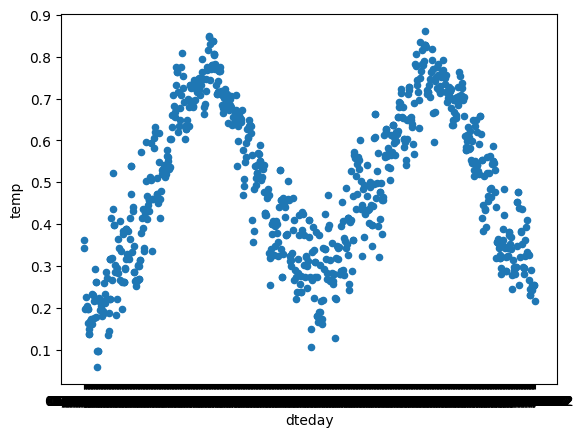

In [43]:
data.plot(x='dteday', y='temp', kind='scatter')

data.